In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns

In [3]:
df=pd.read_csv(r"D:\dinesh document\EXCELR\Data Science\Assingment\Multiple_Linear_Regression\50_Startups.csv")

In [4]:
df.head()

,R_D_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe()

,R_D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<function matplotlib.pyplot.show(close=None, block=None)>

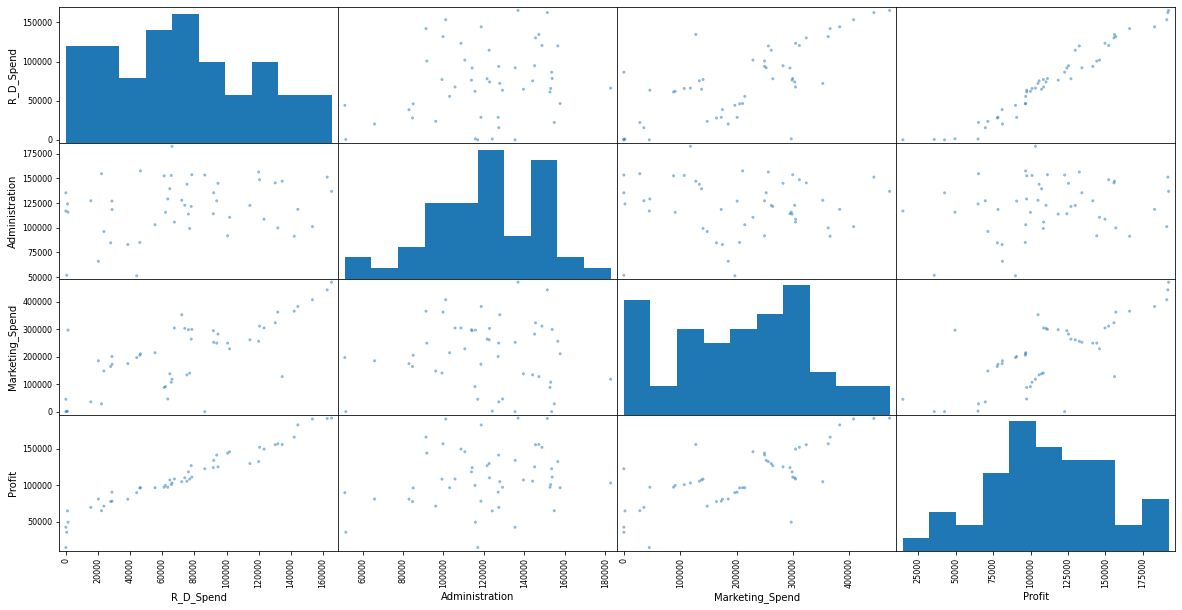

In [6]:
pd.plotting.scatter_matrix(df,figsize=(20,10))
plt.show

In [7]:
df.corr()

,R_D_Spend,Administration,Marketing_Spend,Profit
R_D_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
# Model 
m_Profit=ols('Profit~R_D_Spend  + Administration + Marketing_Spend + State',data=df).fit()
vif=1/(1-m_Profit.rsquared)
vif

20.30559281026129

### VIF is equal to 20.30. It is greater than 20 hence there is multicollinerity. R_D_Spend and Marketing_Spend are correleted hence we will remove R_D_Spend.

In [9]:
m_Profit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.34e-27
Time:                        12:49:36   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R_D_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R-squared of model is 0.951. 95% of the variance in the dependent variable explained by dependent variable. Adj.R-squared of model is 0.945.

In [10]:
# Remove R_D_Spend
df1=df[['Administration','Marketing_Spend','State','Profit']]

In [11]:
df1.head(2)

,Administration,Marketing_Spend,State,Profit
0,136897.80,471784.10,New York,192261.83
1,151377.59,443898.53,California,191792.06


<function matplotlib.pyplot.show(close=None, block=None)>

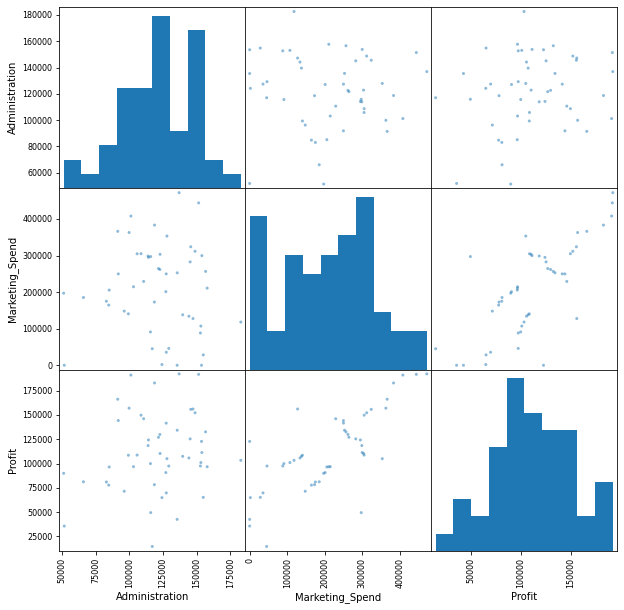

In [12]:
pd.plotting.scatter_matrix(df1,figsize=(10,10))
plt.show

In [13]:
df1.corr()

,Administration,Marketing_Spend,Profit
Administration,1.000000,-0.032154,0.200717
Marketing_Spend,-0.032154,1.000000,0.747766
Profit,0.200717,0.747766,1.000000


In [14]:
m_Profit_new = ols('Profit~Administration + Marketing_Spend + State',data=df1).fit()
vif=1/(1-m_Profit_new.rsquared)
vif

2.5846973128646744

### VIF is equal to 2.58 It is greater than 20 hence there is no multicollinerity.

In [15]:
m_Profit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           7.78e-09
Time:                        12:49:45   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.903e+04   1.84e+04      1.033      0.307   -1.81e+04    5.61e+04
State[T.Florida]  -1703.7028   9337.989     -0.182      0.856   -2.05e+04    1.71e+04
State[T.New York]  3875.7625   9002.603      0.431      0.669   -1.43e+04     2.2e+04
Administration        0.3239      0.133      2.426      0.019       0.055       0.593
Marketing_Spend       0.2507      0.031      7.997      0.000       0.188       0.314
==============================================================================
Omnibus:                        5.729   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.349
Skew:                          -0.461   Prob(JB):                       0.0689
Kurtosis:                       4.311   Cond. No.                     1.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R-squared of model is 0.951. 95% of the variance in the dependent variable explained by dependent variable. Adj.R-squared of model is 0.945.

In [16]:
one_hot_encoded_df = pd.get_dummies(df1, columns = ['State'])
one_hot_encoded_df.head(2)

,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,136897.80,471784.10,192261.83,0,0,1
1,151377.59,443898.53,191792.06,1,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

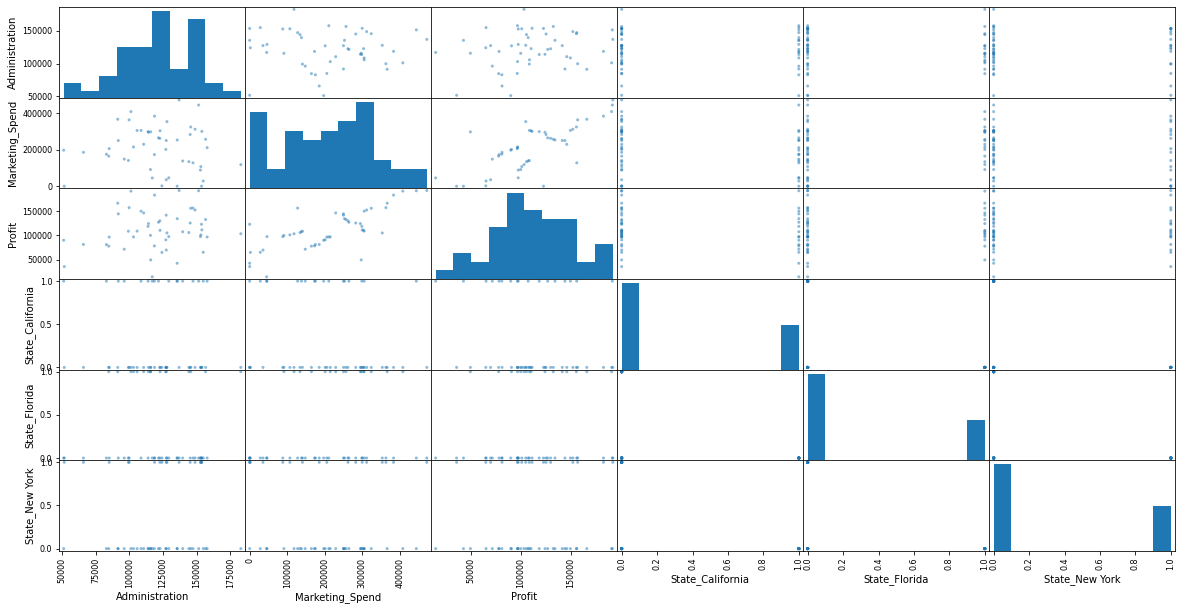

In [17]:
pd.plotting.scatter_matrix(one_hot_encoded_df,figsize=(20,10))
plt.show

In [18]:
one_hot_encoded_df.corr()

,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
Administration,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [19]:
one_hot_encoded_df.rename(columns={'State_New York':'State_New_York'},inplace=True)

In [20]:
one_hot_encoded_df.columns

Index(['Administration', 'Marketing_Spend', 'Profit', 'State_California',
       'State_Florida', 'State_New_York'],
      dtype='object')

In [21]:
m_one_hot_encoded_df=ols('Profit~Administration + Marketing_Spend +State_California + State_Florida + State_New_York',data=one_hot_encoded_df).fit()
vif=1/(1-m_one_hot_encoded_df.rsquared)
vif

2.5846973128646744

In [22]:
m_one_hot_encoded_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           7.78e-09
Time:                        12:49:54   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.482e+04   1.36e+04      1.091      0.281   -1.25e+04    4.22e+04
Administration       0.3239      0.133      2.426      0.019       0.055       0.593
Marketing_Spend      0.2507      0.031      7.997      0.000       0.188       0.314
State_California  4214.9699   6660.035      0.633      0.530   -9199.028    1.76e+04
State_Florida     2511.2671   7380.550      0.340      0.735   -1.24e+04    1.74e+04
State_New_York    8090.7324   6855.885      1.180      0.244   -5717.730    2.19e+04
==============================================================================
Omnibus:                        5.729   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.349
Skew:                          -0.461   Prob(JB):                       0.0689
Kurtosis:                       4.311   Cond. No.                     3.99e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

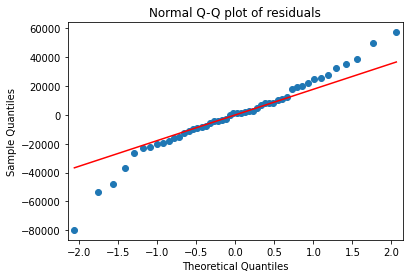

In [23]:
# QQ plot
import statsmodels.api as sm
qqplot=sm.qqplot(m_one_hot_encoded_df.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

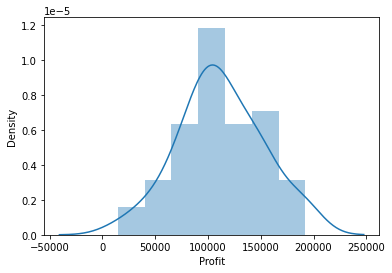

In [24]:
sns.distplot(one_hot_encoded_df['Profit'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

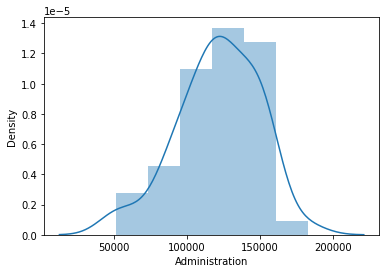

In [25]:
sns.distplot(one_hot_encoded_df['Administration'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing_Spend', ylabel='Density'>

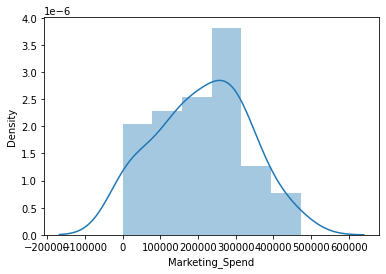

In [26]:
sns.distplot(one_hot_encoded_df['Marketing_Spend'])

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [28]:
model_influence = m_one_hot_encoded_df.get_influence()
(c, _) = model_influence.cooks_distance

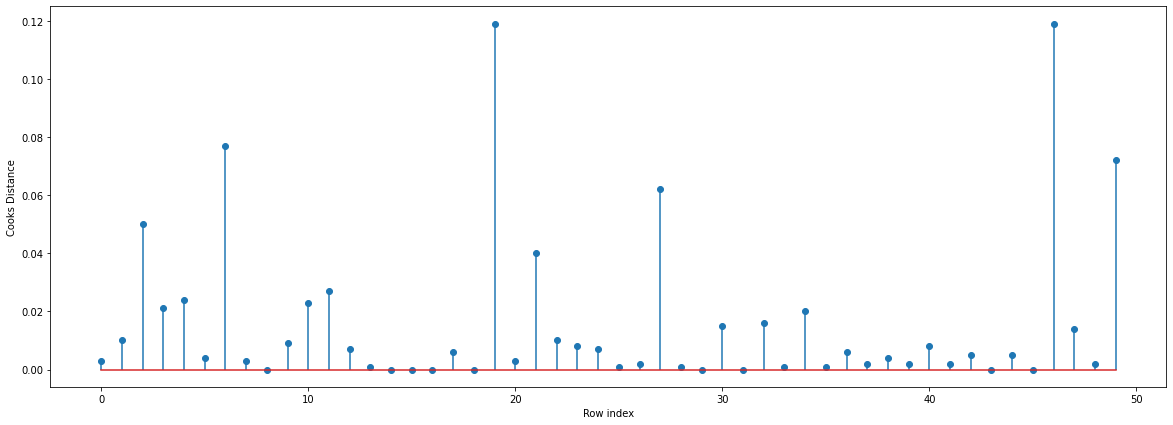

In [29]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(one_hot_encoded_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(19, 0.11932405975921126)

In [97]:
one_hot_encoded_df.shape

(50, 6)

In [31]:
k = one_hot_encoded_df.shape[1]
n = one_hot_encoded_df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.42000000000000004

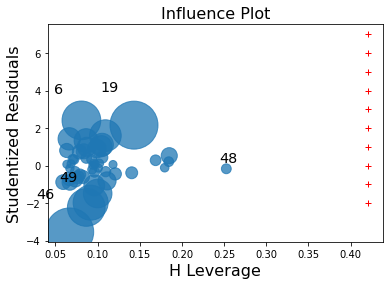

In [99]:
influence_plot(m_one_hot_encoded_df,aplha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [100]:
y

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7]

In [101]:
x

[0.42000000000000004,
 0.42000000000000004,
 0.42000000000000004,
 0.42000000000000004,
 0.42000000000000004,
 0.42000000000000004,
 0.42000000000000004,
 0.42000000000000004,
 0.42000000000000004,
 0.42000000000000004]

In [33]:
#Drop 19 and 46 observations
one_hot_encoded_df1=one_hot_encoded_df.drop(one_hot_encoded_df.index[[6,27,19,46]],axis=0)

In [37]:
one_hot_encoded_df1.head(5)

,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New_York
0,136897.80,471784.10,192261.83,0,0,1
1,151377.59,443898.53,191792.06,1,0,0
2,101145.55,407934.54,191050.39,0,1,0
3,118671.85,383199.62,182901.99,0,0,1
4,91391.77,366168.42,166187.94,0,1,0


In [35]:
m_one_hot_encoded_df1=ols('Profit~Administration + Marketing_Spend +State_California + State_Florida + State_New_York',data=one_hot_encoded_df1).fit()
vif=1/(1-m_one_hot_encoded_df1.rsquared)
vif

5.121949748915031

In [36]:
m_one_hot_encoded_df1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     42.25
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           5.01e-14
Time:                        12:50:24   Log-Likelihood:                -515.14
No. Observations:                  46   AIC:                             1040.
Df Residuals:                      41   BIC:                             1049.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.743e+04   9779.518      1.783      0.082   -2317.125    3.72e+04
Administration       0.2282      0.098      2.329      0.025       0.030       0.426
Marketing_Spend      0.2908      0.024     12.302      0.000       0.243       0.339
State_California  1962.4092   4865.104      0.403      0.689   -7862.868    1.18e+04
State_Florida     7137.5155   5447.830      1.310      0.197   -3864.600    1.81e+04
State_New_York    8333.0884   5028.613      1.657      0.105   -1822.402    1.85e+04
==============================================================================
Omnibus:                        0.737   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.688
Skew:                          -0.279   Prob(JB):                        0.709
Kurtosis:                       2.781   Cond. No.                     3.91e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.13e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
m_one_hot_encoded_df1

### Prediction of profit

In [50]:
predict_profit=m_one_hot_encoded_df1.predict(one_hot_encoded_df1[['Administration', 'Marketing_Spend', 'State_California', 'State_Florida', 'State_New_York']])

In [53]:
predict_profit

0     194180.748399
1     183005.648453
2     166262.396761
3     164264.762541
4     151892.706998
5     154048.518762
7     151948.141630
8     150305.518067
9     132870.876163
10    116436.746549
11    112956.367203
12    126265.727301
13    123777.361755
14    134874.754176
15    129858.941546
16    124002.917732
17    141031.102575
18    136374.407324
20    132217.808135
21    148005.624857
22    140780.571271
23    137315.980913
24     89293.199198
25     91351.615431
26     96434.721570
28    100597.532753
29     91835.036887
30     77453.832788
31     86258.352589
32     62278.937706
33    110493.426811
34    116668.747263
35    104928.756755
36    112041.423964
37     88386.138308
38     94682.137095
39     89213.105930
40     96686.826635
41     91721.269190
42     84376.422782
43     65162.499154
44     62955.626910
45     54647.125380
47     50295.154804
48     37572.096193
49     59221.914790
dtype: float64

### graph of actual and predicted profit

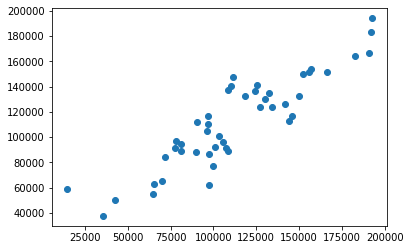

In [54]:
plt.scatter(one_hot_encoded_df1['Profit'],predict_profit)

In [57]:
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()

In [82]:
x=one_hot_encoded_df1[['Administration', 'Marketing_Spend', 'State_California', 'State_Florida', 'State_New_York']]
y=one_hot_encoded_df1.loc[:,'Profit']

In [78]:
x

,Administration,Marketing_Spend,State_California,State_Florida,State_New_York
0,136897.80,471784.10,0,0,1
1,151377.59,443898.53,1,0,0
2,101145.55,407934.54,0,1,0
3,118671.85,383199.62,0,0,1
4,91391.77,366168.42,0,1,0
5,99814.71,362861.36,0,0,1
7,145530.06,323876.68,0,1,0
8,148718.95,311613.29,0,0,1
9,108679.17,304981.62,1,0,0
10,110594.11,229160.95,0,1,0


In [79]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [83]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [84]:
x

,Administration,Marketing_Spend,State_California,State_Florida,State_New_York
0,0.596766,2.175513,-0.730297,-0.695608,1.437591
1,1.110011,1.941574,1.369306,-0.695608,-0.695608
2,-0.670495,1.639865,-0.730297,1.437591,-0.695608
3,-0.049264,1.432358,-0.730297,-0.695608,1.437591
4,-1.016224,1.289479,-0.730297,1.437591,-0.695608
5,-0.717667,1.261736,-0.730297,-0.695608,1.437591
6,0.902742,0.934685,-0.730297,1.437591,-0.695608
7,1.015774,0.831804,-0.730297,-0.695608,1.437591
8,-0.403461,0.776170,1.369306,-0.695608,-0.695608
9,-0.335585,0.140093,-0.730297,1.437591,-0.695608


In [88]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [89]:
mse=mean_squared_error(y,predict_profit)
mae=mean_absolute_error(y,predict_profit)
rmse=np.sqrt(mse)
print('mae',mae)
print('RMSE',rmse)
print('The mean squared value is:',mse)
print('The R2 score is:',r2_score(y,predict_profit))

mae 14171.357820106057
RMSE 17671.969899111868
The mean squared value is: 312298520.11511594
The R2 score is: 0.8047618487057926


In [56]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

### Lasso Regression

In [86]:
lasso=Lasso()
lasso.fit(x,y)
lassoy=lasso.predict(x)
print(lasso.score(x,y))

0.8047618466223706


### Ridge regression

In [92]:
ridge=Ridge()
ridge.fit(x,y)
yridge=ridge.predict(x)
print(ridge.score(x,y))

0.8044024545475223
